# Diabetic Discharge: Navigating Readmission Risks
#### By Rebekah McLaughlin

<p align="center">
  <img src = https://www.uclahealth.org/sites/default/files/styles/max_width_024000_960/public/images/patient-and-doctor-compassion_0.jpg?itok=lTl_75jr>
</p> 

## Overview

VitalCare Health Syste is aiming to reduce early readmission rates among diabetic patients to improve overall patient outcomes. To achieve this goal, an analysis will be conducted on a comprehensive dataset about hospitalized diabetic patients and whether they were readmitted within 30 days of discharge.

Tracking and mitigating readmission rates within 30 days of discharge serves as a critical key performance indicator for hospitals for two main reasons:

1. Firstly, an early readmission, occurring within 30 days of discharge, signals potential gaps in care that weren't addressed prior to the patient's discharge. These gaps elevate the risk of poorer patient outcomes, underlining the importance of comprehensive care continuity.

2. Secondly, early readmissions within this timeframe can cause significant financial burdens on hospitals. In addition to this, hospitals often receive only partial reimbursement from insurance providers for early readmissions.

#### **The Dataset**

The dataset includes a decade's worth of US hospital data spanning from 1999 to 2008, with over 100,000 entries, each representing a patient's hospitalization and associated details. The target is `'readmission'`. It has more than 50 features, including demographic information such as:
- age group
- gender
- race

Alongside medical specifics such as:
- diagnoses
- medications prescribed
- number of procedures during hospitalization
- other pertinent details regarding the patient's stay.

For a full description and download of the dataset, click <a href = "https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008">here</a>. Also, a full descripton of each feature label is in the Data folder.

#### **The Goal**

The goal of this project is to use the dataset to develop a model capable of accurately identifying patients who are at risk of being readmitted within 30 days of discharge.

##### **Importing libraries and loading data**

The first step is importing the necessary libraries and analysis tools. Next, I will load the dataset into a pandas dataframe.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, recall_score
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


df = pd.read_csv('diabetic_data.csv')
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


## 1. Initial Data Assessment

I'll take a quick  look at the details of the dataframe.

Then I'll inspect for missing values, extent of missing-ness, and near zero-variance values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [3]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

### Inspecting for missing-ness, redundancy, and near zero-variance values

In [4]:
(df.isna().sum() / len(df)) * 100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         0.000000
gender                       0.000000
age                          0.000000
weight                       0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                   0.000000
medical_specialty            0.000000
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.000000
diag_2                       0.000000
diag_3                       0.000000
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [5]:
df['payer_code'].value_counts(normalize=True)

payer_code
?     0.395574
MC    0.318761
HM    0.061651
SP    0.049201
BC    0.045742
MD    0.034707
CP    0.024890
UN    0.024055
CM    0.019034
OG    0.010151
PO    0.005817
DM    0.005395
CH    0.001435
WC    0.001327
OT    0.000934
MP    0.000776
SI    0.000540
FR    0.000010
Name: proportion, dtype: float64

In [6]:
df['weight'].value_counts(normalize=True)

weight
?            0.968585
[75-100)     0.013128
[50-75)      0.008814
[100-125)    0.006142
[125-150)    0.001425
[25-50)      0.000953
[0-25)       0.000472
[150-175)    0.000344
[175-200)    0.000108
>200         0.000029
Name: proportion, dtype: float64

#### **Missing Data Analysis**

Clearly 'max_glu_serum' and 'A1Cresult' have a concerning amount of missing values, with approximately 95% and 83% missing respectively. However, there are additional hidden missing values in the dataframe denoted as '?'. This is observed in 'payer_code', with around 40% having the value '?', and in 'weight', where approximately 97% have the value '?'.

I'll likely drop these columns due to the amount missing, but before deciding, I have a bit more analysis to complete. 

#### **Oral Diabetes Medication Analysis**

Many features in the dataframe encompass oral diabetes medications, such as `'glipizide'` and `'acarbose'`. The values in these columns are all one of the following:
- 'No'
- 'Steady'
- 'Up'
- 'Down'

The majority of patients documented in this dataframe are not prescribed most of these medications, with most medications having 95% or fewer patients taking them. 

However, previous research indicates that changing a prescribed diabetes medication can correlate with early readmission. Because of this, I'll opt not to discard these features entirely. To assess how many of these medication features exhibit near-zero variance, I will generate a report to see the percentage of patients taking each medication and the percentage of those who had changes to their prescriptions.

In [7]:
# Define the list of oral medication features
oral_medication_features = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
                           'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
                           'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
                           'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin',
                           'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                           'metformin-pioglitazone']

# Print report for each oral medication feature
for feature in oral_medication_features:
    print(f"=== {feature} ===")
    value_counts = df[feature].value_counts(dropna=False)
    total_count = value_counts.sum()
    percentages = value_counts / total_count * 100
    #print("Value Counts:")
    #print(value_counts)
    print("Percentages:")
    print(percentages)
    print()

=== metformin ===
Percentages:
metformin
No        80.358862
Steady    18.027632
Up         1.048484
Down       0.565022
Name: count, dtype: float64

=== repaglinide ===
Percentages:
repaglinide
No        98.487707
Steady     1.359983
Up         0.108091
Down       0.044219
Name: count, dtype: float64

=== nateglinide ===
Percentages:
nateglinide
No        99.309200
Steady     0.656408
Up         0.023584
Down       0.010809
Name: count, dtype: float64

=== chlorpropamide ===
Percentages:
chlorpropamide
No        99.915492
Steady     0.077629
Up         0.005896
Down       0.000983
Name: count, dtype: float64

=== glimepiride ===
Percentages:
glimepiride
No        94.899082
Steady     4.588959
Up         0.321325
Down       0.190633
Name: count, dtype: float64

=== acetohexamide ===
Percentages:
acetohexamide
No        99.999017
Steady     0.000983
Name: count, dtype: float64

=== glipizide ===
Percentages:
glipizide
No        87.534147
Steady    11.158933
Up         0.756638
Down     

#### **Oral Diabetes Medication Analysis**

Many of these medications are near zero-variance. However, since changes in diabetes medications can be critical to the target, these will be retained for potential feature engineering.

#### **Dropping duplicates, child rows, and features with large amounts of missing values**

Duplicate 'patient_nbr' values are present in the dataframe. It is impossible to determine whether the hospitalizations of these patients are related or independent. Therefore, the first instance of each patient number will be kept, and any subsequent entries with the same number will be dropped.

Next, rows with age categories '0-10' and '10-20' will be removed. The hospital focuses exclusively on adult care, so the analysis will concentrate on age groups containing only adult ages.

Finally, columns with a significant amount of missing data, irrelevant columns, and the 'race' column will be dropped. The 'race' column will be omitted as 'Caucasian' is oversampled, and efforts will be made to mitigate potential bias in this regard.

In [8]:
# Check for duplicate values in the 'patient_id' column
duplicate_patient_nbr = df[df.duplicated('patient_nbr')]

# Display the rows with duplicate 'patient_id' values
duplicate_patient_nbr

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
79,1070256,23043240,Caucasian,Female,[50-60),?,2,1,4,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
81,1077924,21820806,AfricanAmerican,Male,[50-60),?,1,6,7,3,...,No,No,No,No,No,No,No,No,No,NO
143,2309376,41606064,Caucasian,Male,[20-30),?,2,1,2,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
175,2552952,86240259,Caucasian,Female,[70-80),?,1,3,7,11,...,No,Up,No,No,No,No,No,Ch,Yes,>30
307,3174918,5332491,Other,Female,[60-70),?,6,25,7,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101760,443847176,50375628,AfricanAmerican,Female,[60-70),?,1,1,7,6,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO


In [9]:
df = df.drop_duplicates(subset=['patient_nbr'], keep='first')

In [10]:
df = df.drop(columns=['max_glu_serum', 'A1Cresult', 'payer_code', 'weight', 'medical_specialty', 'encounter_id', 'patient_nbr', 'race'])

In [11]:
df['age'].value_counts()

age
[70-80)     18210
[60-70)     15960
[50-60)     12466
[80-90)     11589
[40-50)      6878
[30-40)      2699
[90-100)     1900
[20-30)      1127
[10-20)       535
[0-10)        154
Name: count, dtype: int64

In [12]:
# Drop rows where the value in the 'age' column is either '[0-10)' or '[10-20)'
df = df[~df['age'].isin(['[0-10)', '[10-20)'])]

## 2. Data Cleaning, feature numerical code replacements, and feature engineering 

Before proceeding to exploratory data analysis (EDA), it is necessary to perform some cleaning. This includes replacing numerical codes with their corresponding meanings in certain columns.

For instance, all diagnoses in 'diag_1', 'diag_2', and 'diag_3' are represented by numerical values, each corresponding to a specific diagnosis. Similarly, 'admission_type_id', 'admission_source_id', and 'discharge_disposition_id' contain codes that represent descriptions. These numerical codes will be replaced with phrases summarizing their descriptions.

Diagnosis code details can be found <a href = "https://www.cms.gov/medicare/coordination-benefits-recovery/overview/icd-code-lists">here</a>.

In [13]:
df['diag_1'].value_counts()
unique_diag_1_values = [df['diag_1'].value_counts()]
unique_diag_1_values[:50]

[diag_1
 414       5233
 428       3979
 786       3039
 410       2902
 486       2430
           ... 
 848          1
 250.51       1
 691          1
 834          1
 V51          1
 Name: count, Length: 696, dtype: int64]

In [14]:
# Replace diagnoses with category names
# Circulatory: 390-459, 785 Cardiac/vascular disease
# Respiratory: 460-519, 786 Respiratory tract disease
# Digestive: 520-579, 787 Diseases of the digestive system
# Diabetes: 250.xx Diabetes mellitus
# Injury: 800-999 Injury and poisoning
# Musculoskeletal: 710-739 Diseases of the musculoskeletal system and/or connective tissue
# Genitourinary: 580-629, 788 Diseases of the genitourinary system
# Neoplasms: 140-239 Neoplasms
# Pregnacy: 630–679 Complications of pregnancy or childbirth
# Other: 780, 781, 784, 790-799, 240-279 except 250, 680-709, 782, 001-139, 290-319, E-V (beginning with a letter), 280-289, 320-359, 630-679, 360-389, 740-759

def categorize_diagnosis(diag):
    if diag.isnumeric():
        diag = int(diag)
        if diag in range(390,460) or diag==785:
            return 'Circulatory'
        elif diag in range(460,520) or diag==786:
            return 'Respiratory'
        elif diag in range(520,580) or diag==787:
            return 'Digestive'
        elif diag in np.arange(250,260,0.01):
            return 'Diabetes'
        elif diag in range(800,1000):
            return 'Injury'
        elif diag in range(710,740):
            return  'Musculoskeletal'
        elif diag in range(580,630) or diag==788:
            return  'Genitourinary'
        elif diag in range(140,240):
            return  'Neoplasms'
        elif diag in range(630-680):
            return 'Pregnancy'
        else:
            return 'Other'
    else:
        if "250" in diag:
            return 'Diabetes'
        else:
            return  'Other'

In [15]:
df['diag_1_type'] = df.apply(lambda row: categorize_diagnosis(row['diag_1']), axis=1)
df['diag_2_type'] = df.apply(lambda row: categorize_diagnosis(row['diag_2']), axis=1)
df['diag_3_type'] = df.apply(lambda row: categorize_diagnosis(row['diag_3']), axis=1)

# Remove original diagnosis features
df.drop(columns=['diag_1', 'diag_2', 'diag_3'], inplace=True)

In [16]:
display(df['diag_1_type'].value_counts())
display(df['diag_2_type'].value_counts())
display(df['diag_3_type'].value_counts())

diag_1_type
Circulatory        21888
Other              12272
Respiratory         9743
Digestive           6555
Diabetes            5290
Injury              4760
Musculoskeletal     4077
Genitourinary       3505
Neoplasms           2739
Name: count, dtype: int64

diag_2_type
Circulatory        22524
Other              18190
Diabetes            9669
Respiratory         7220
Genitourinary       5449
Digestive           2885
Injury              1848
Neoplasms           1749
Musculoskeletal     1295
Name: count, dtype: int64

diag_3_type
Circulatory        21301
Other              21094
Diabetes           12610
Respiratory         4842
Genitourinary       4186
Digestive           2724
Injury              1435
Musculoskeletal     1376
Neoplasms           1261
Name: count, dtype: int64

#### **Primary known diagnosis feature engineering**

Replacing the codes with the categories gave a meaningful label to most patients' diagnoses, but the category 'Other' still constitutes a significant portion of them.

To make this data more meaningful, a new feature called 'primary_diagnosis' will be created. This feature will contain the value from 'diag_1_type' unless it is 'Other'. If 'diag_1_type' is 'Other', then the value will be taken from 'diag_2_type'. However, if 'diag_2_type' is also 'Other', the value will be filled with the value from 'diag_3_type', regardless of if it is 'Other' or another value.

Thus, 'primary_diagnosis' will hold the value of the first known diagnosis for the patient, unless all three diagnoses are categorized as 'Other'.

In [17]:
# Define a function to determine the primary known diagnosis
def determine_primary_diagnosis(row):
    if row['diag_1_type'] != 'Other':
        return row['diag_1_type']
    elif row['diag_2_type'] != 'Other':
        return row['diag_2_type']
    else:
        return row['diag_3_type']


# Create the 'primary_diagnosis' column using the defined function
df['primary_diagnosis'] = df.apply(determine_primary_diagnosis, axis=1)


df = df.drop(columns=['diag_1_type', 'diag_2_type', 'diag_3_type'])

df['primary_diagnosis'].value_counts()

primary_diagnosis
Circulatory        24926
Respiratory        10890
Diabetes            8488
Digestive           7254
Injury              5168
Genitourinary       4973
Musculoskeletal     4411
Neoplasms           3153
Other               1566
Name: count, dtype: int64

#### **Replacing Admission and Discharge feature codes with meanings**

[Admission Types]("https://raw.githubusercontent.com/bluerose98/diabetic_data/main/admission_type.csv")

[Admission Sources]("https://raw.githubusercontent.com/bluerose98/diabetic_data/main/admission_source.csv")

[Discharge Dispositions]("https://raw.githubusercontent.com/bluerose98/diabetic_data/main/discharge.csv")


In [18]:
df['admission_type'] = df['admission_type_id'].replace({1: 'emergent', 2: 'urgent', 3: 'elective', 4: 'newborn', 5: 'NA', 6: 'NA', 7: 'trauma center', 8: 'NA'})
df['admission_source'] = df['admission_source_id'].replace({1: 'referral', 2: 'referral', 3: 'referral', 4: 'hospital transfer', 5: 'SNF transfer', 6: 'medical transfer', 7: 'emergency room', 8: 'law enforcement', 9: 'NA', 10: 'hospital transfer', 11: 'infant delivery', 12: 'infant delivery', 13: 'sick baby', 14: 'infant delivery', 17: 'NA', 18: 'home health', 20: 'NA', 21: 'NA', 22: 'hospital transfer', 25: 'medical transfer', 26: 'hospice'})
df['discharge_dispo'] = df['discharge_disposition_id'].replace({1: 'home', 2: 'specialty hospital', 3: 'SNF/ICF', 4: 'SNF/ICF', 5: 'specialty hospital', 6: 'home with home health', 7: 'left AMA', 8: 'home with home health', 9: 'hospital transfer', 10: 'specialty hospital', 11: 'expired', 12: 'hospital transfer', 13: 'hospice', 14: 'hospice', 16: 'home', 17: 'home', 18: 'NA', 19: 'hospice', 20: 'hospice', 22: 'SNF/ICF', 23: 'specialty hospital', 24: 'SNF/ICF', 25: 'NA', 15: 'hospital transfer', 27: 'SNF/ICF', 28: 'specialty hospital'})

In [19]:
df['discharge_dispo'].value_counts()

discharge_dispo
home                     43706
SNF/ICF                  10762
home with home health     8353
NA                        3219
specialty hospital        2798
expired                   1075
hospice                    468
left AMA                   398
hospital transfer           50
Name: count, dtype: int64

In [20]:
df = df.drop(columns=['admission_type_id', 'admission_source_id', 'discharge_disposition_id'])

In [21]:
# Dropping last few missing pieces of data and rows with children
df = df[~df['admission_source'].isin(['infant delivery', 'sick baby'])]
df = df[~df['admission_type'].isin(['newborn'])]
df = df[~df['gender'].isin(['Unknown/Invalid'])]

#### **Diabetes Medication feature combining**

23 of the original 50 features in the dataframe pertain to diabetes mellitus medications, including insulin, and 22 oral diabetes management medications. During the initial data analysis, it was observed that many of the oral diabetes medication features have very low variance, some approaching zero. To reduce noise and dimensionality, these columns will ultimately be dropped.

However, approximately half of the patients represented in the dataset are prescribed at least one type of diabetes medication besides insulin. To consolidate these columns and potentially retain relevant information, we will merge all the oral diabetes medications into a single feature with a binary value: '0' indicating no oral diabetes meds prescribed and '1' indicating any oral diabetes meds prescribed.

Additionally, we will create a feature indicating any changes made to any diabetes prescription during the inpatient stay. This could be significant information, as previous research suggests that alterations to prescriptions can be associated with hospital readmission within 30 days of discharge. Considering that diabetes medication can impact a critical lab value, blood sugar, it is conceivable that changes in these types of medication specifically could prompt earlier hospitalization.

The 'insulin' column will be retained, as it is the most frequently prescribed diabetes medication and exhibits much greater variance compared to the other aforementioned features.

In [22]:
diabetes_meds = ['metformin', 'repaglinide', 'nateglinide',
                 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
                 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
                 'glyburide-metformin', 'glipizide-metformin',
                 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                 'metformin-pioglitazone', 'insulin']

oral_diabetes_meds = ['metformin', 'repaglinide', 'nateglinide',
                 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
                 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
                 'glyburide-metformin', 'glipizide-metformin',
                 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                 'metformin-pioglitazone']

# Creating a binary column indicating whether any change was made in diabetic medications
df['diabetes_med_change'] = df[diabetes_meds].apply(lambda row: 1 if 'Up' in row.values or 'Down' in row.values else 0, axis=1)

# Create a new feature indicating if the patient is on any oral diabetes medication
df['oral_diabetes_med'] = df[oral_diabetes_meds].apply(lambda row: 1 if 'Steady' in row.values or 'Up' in row.values or 'Down' in row.values else 0, axis=1)

# Dropping individual medication features except 'insulin'
df.drop(columns=oral_diabetes_meds, inplace=True)

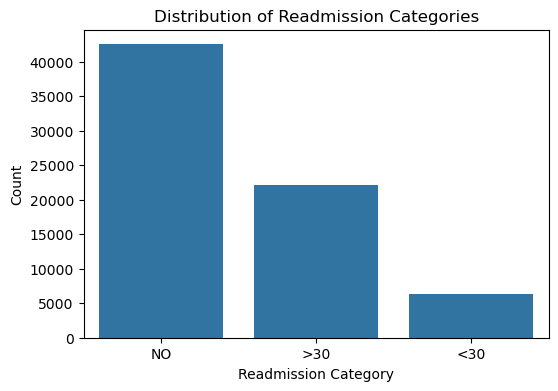

In [23]:
# Plotting the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='readmitted')
plt.title('Distribution of Readmission Categories')
plt.xlabel('Readmission Category')
plt.ylabel('Count')
plt.show()

In [24]:
# Convert target variable values to 0 or 1
df['readmitted'] = df['readmitted'].replace({'NO': 0, '>30': 0, '<30': 1})
df['gender'] = df['gender'].replace({'Female': 1, 'Male': 0})
df['insulin'] = df['insulin'].replace({'No': 0, 'Steady': 1, 'Down': 1, 'Up': 1})
df['change'] = df['change'].replace({'No': 0, 'Ch': 1})
df['any_diabetes_med'] = df['diabetesMed'].replace({'No': 0, 'Yes': 1})
df = df.drop(columns='diabetesMed')

In [25]:
df['approximate_age'] = df['age'].replace({'[70-80)': 75, '[60-70)': 65, '[50-60)': 55, '[80-90)': 85, '[40-50)': 45, '[30-40)': 40, '[90-100)': 95, '[20-30)': 25})
df = df.drop(columns='age')

In [26]:
df.columns

Index(['gender', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'insulin', 'change',
       'readmitted', 'primary_diagnosis', 'admission_type', 'admission_source',
       'discharge_dispo', 'diabetes_med_change', 'oral_diabetes_med',
       'any_diabetes_med', 'approximate_age'],
      dtype='object')

## 3. EDA

Now that all preliminary cleaning has been completed, a comprehensive exploratory data analysis (EDA) can be conducted.

- First, we'll examine the counts of all variables in each feature.
- Next, we'll review descriptive statistics.
- Lastly, we'll conduct an initial assessment of the relationship between each feature and the target variable, 'readmitted':
    - For numerical columns, we'll calculate Pearson's correlation.
    - For categorical features, we'll perform a chi-squared test and examine the readmission distribution across categories.

In [27]:
numeric_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'approximate_age']
categorical_cols = ['primary_diagnosis', 'admission_type', 'admission_source', 'discharge_dispo', 'gender', 'change', 'diabetes_med_change', 'oral_diabetes_med', 'insulin', 'any_diabetes_med']

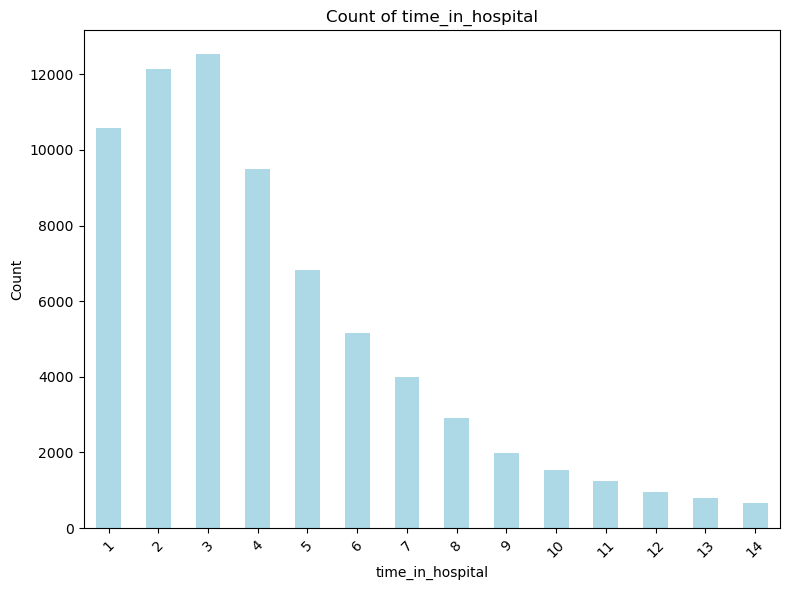

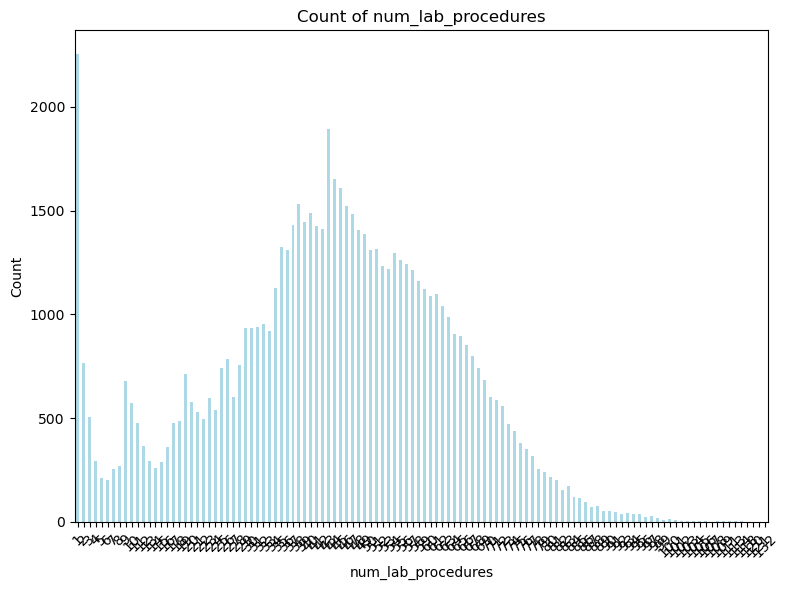

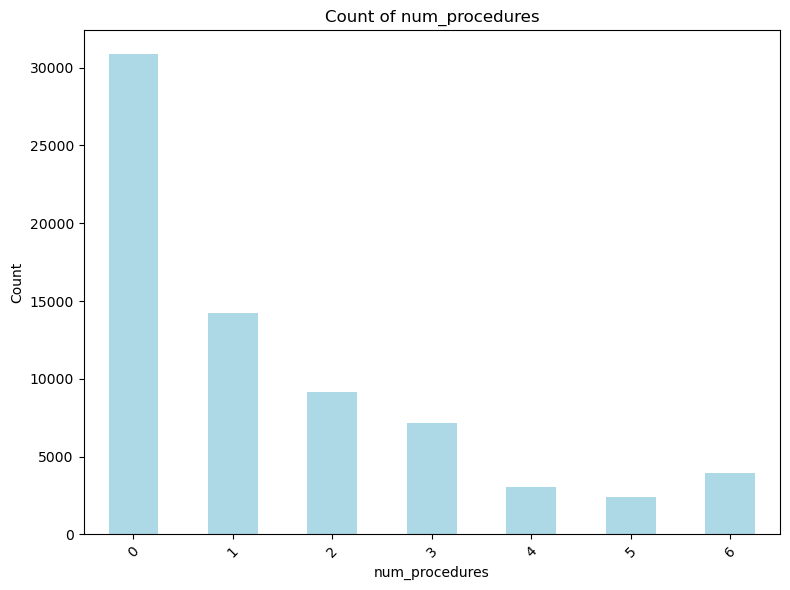

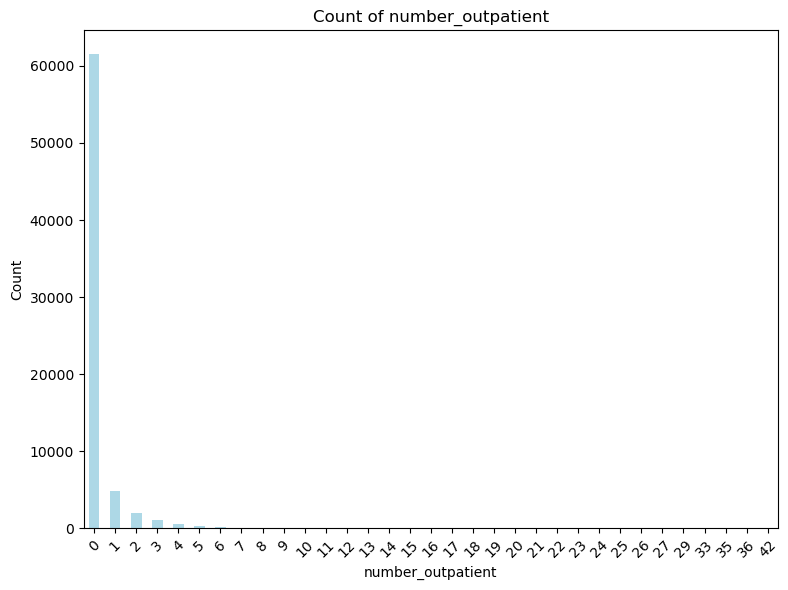

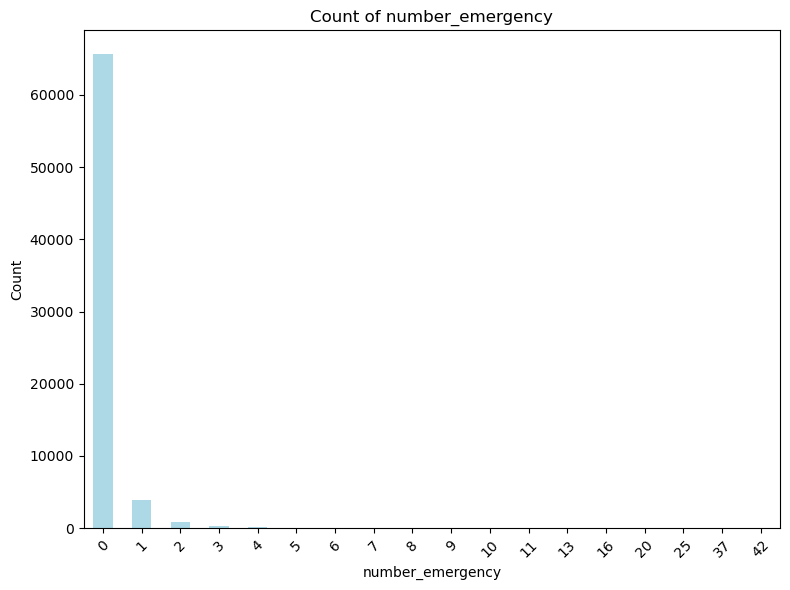

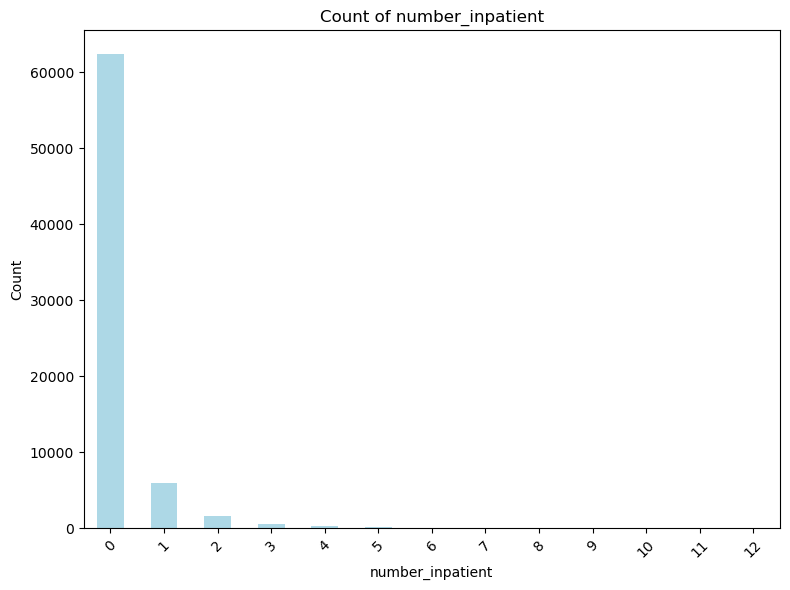

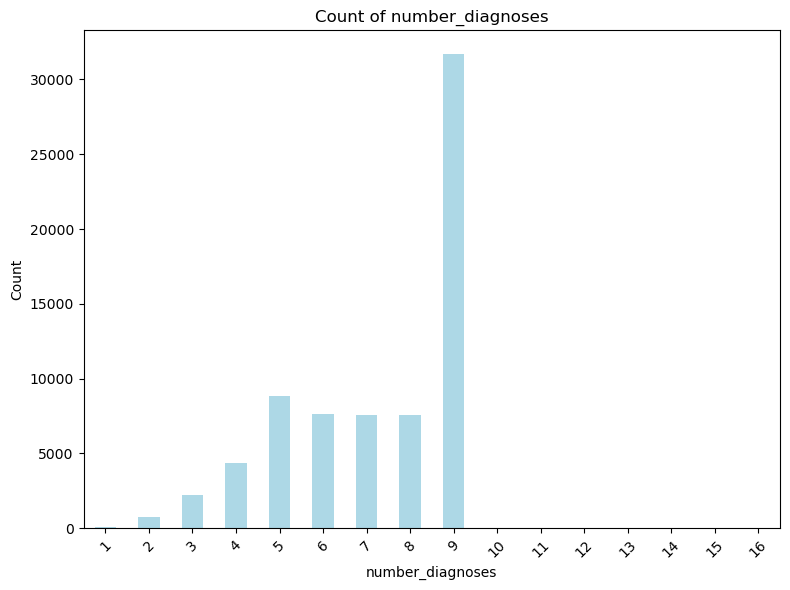

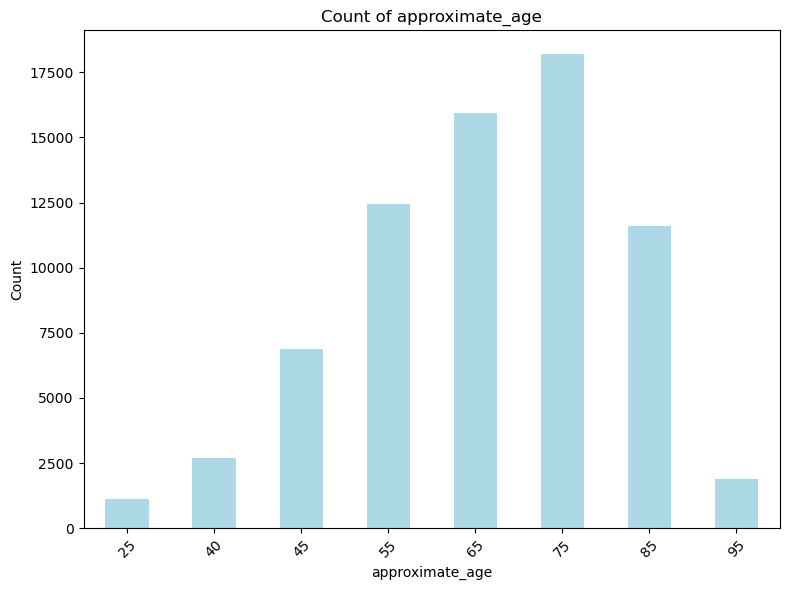

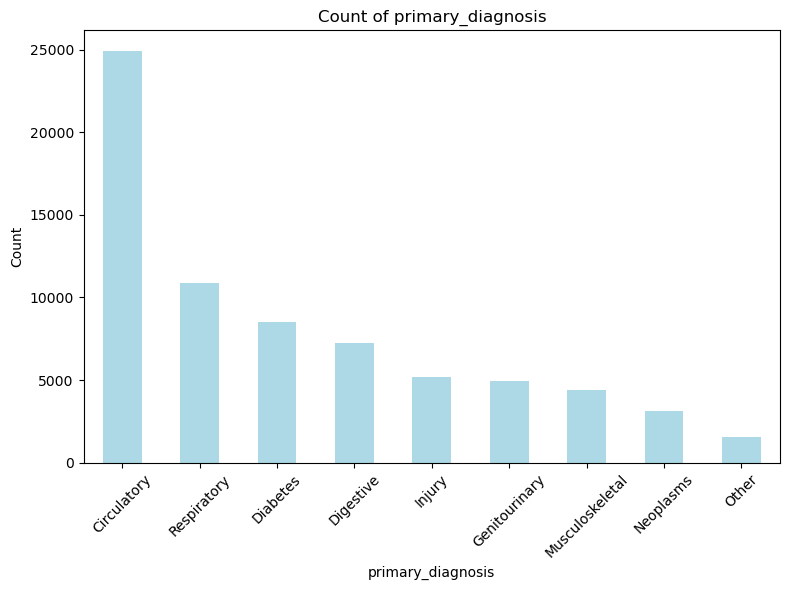

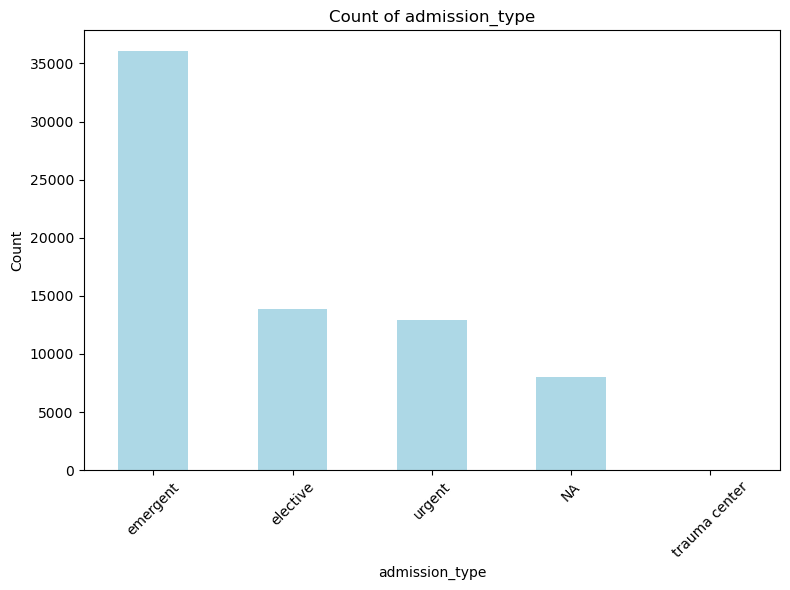

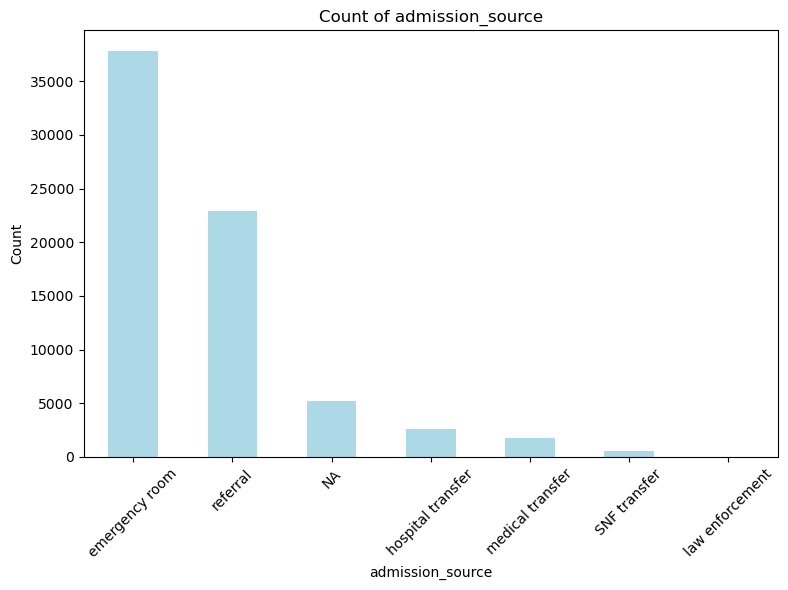

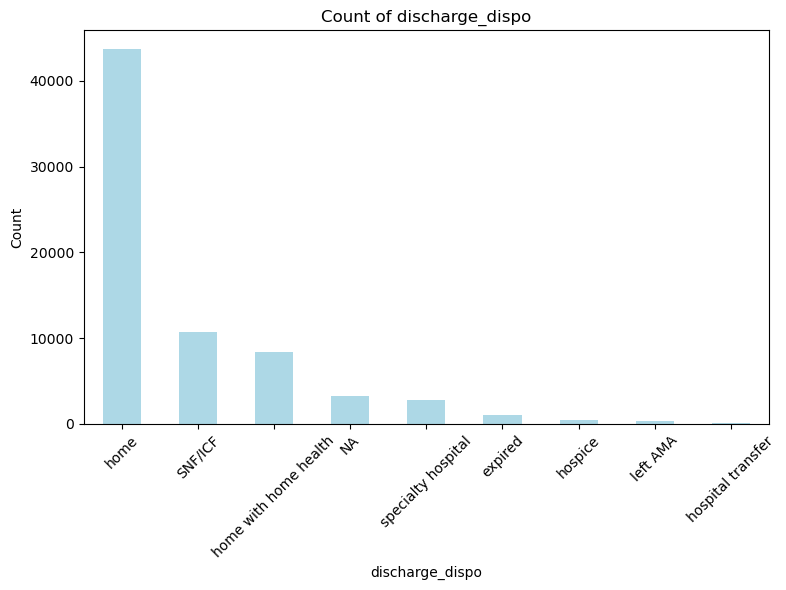

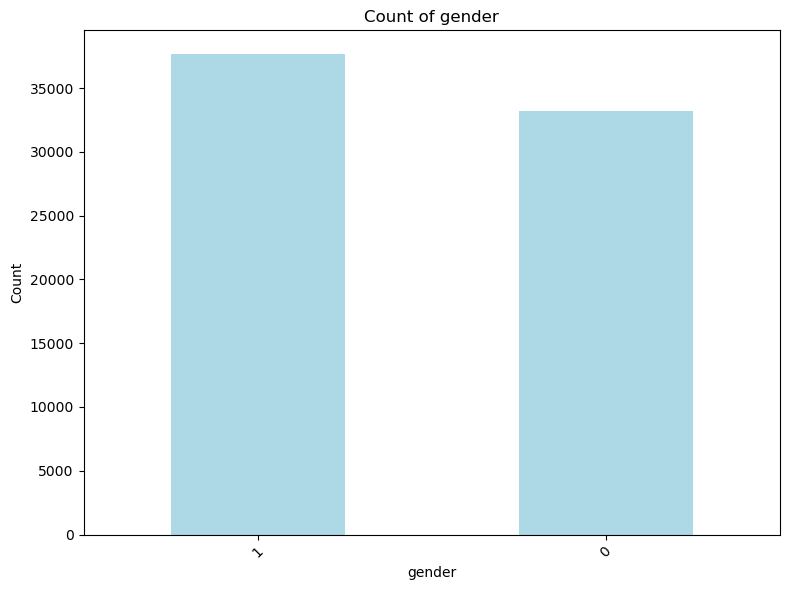

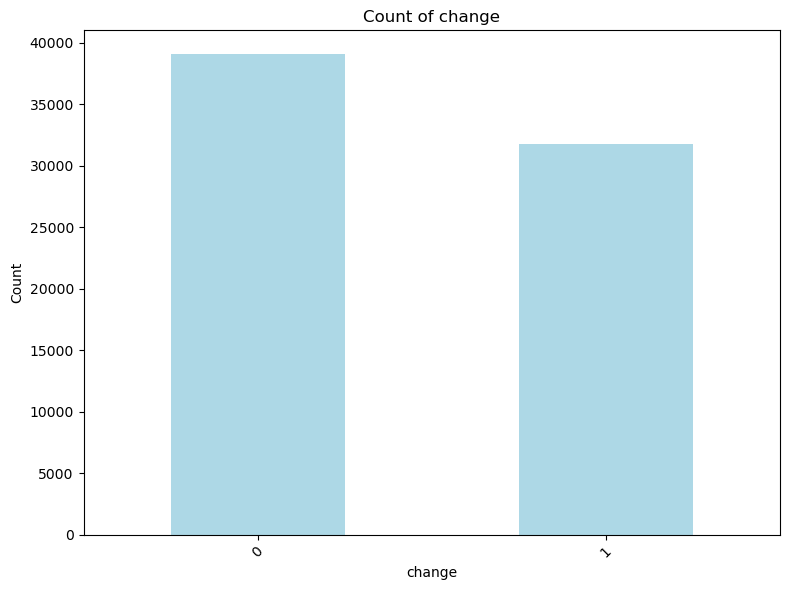

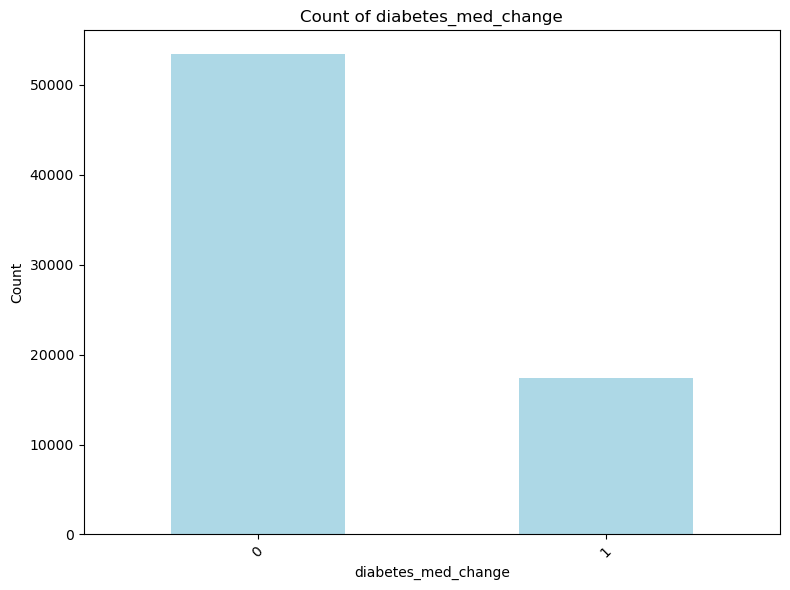

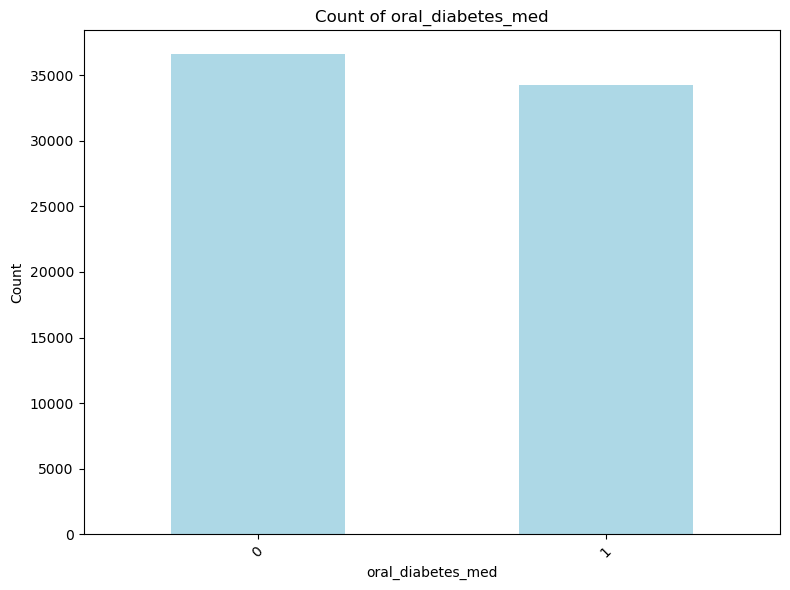

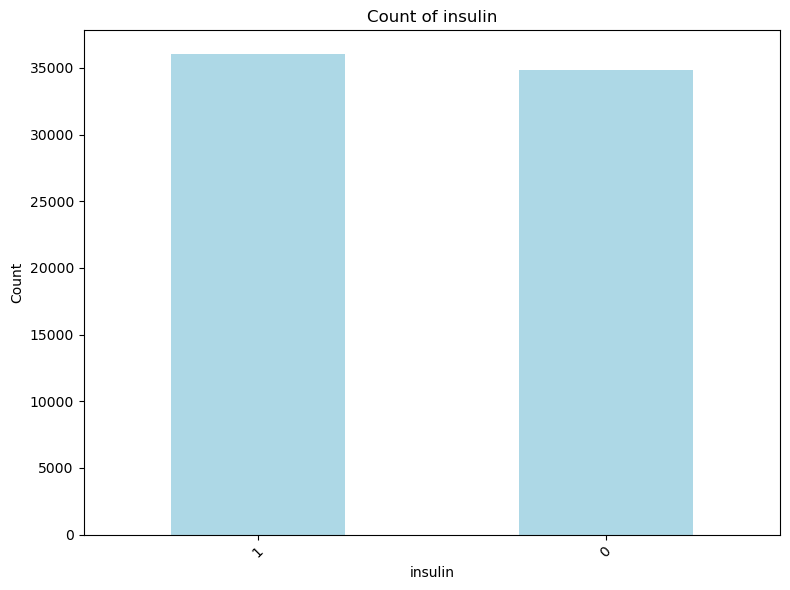

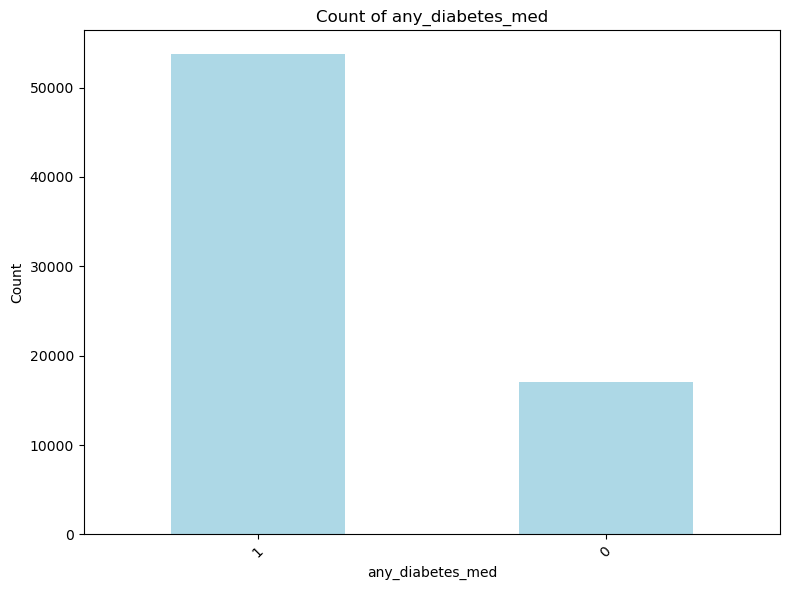

In [28]:
# Plotting for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().sort_index().plot(kind='bar', color='lightblue')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plotting for nominal categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    df[col].value_counts().plot(kind='bar', color='lightblue')
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [29]:
df[numeric_cols].describe()

,time_in_hospital,num_lab_procedures,num_procedures,number_outpatient,number_emergency,number_inpatient,number_diagnoses,approximate_age
count,70815.000000,70815.000000,70815.000000,70815.000000,70815.000000,70815.000000,70815.000000,70815.000000
mean,4.303777,43.087679,1.441460,0.281649,0.103467,0.178352,7.281904,66.356704
std,2.953704,19.945648,1.762813,1.072429,0.508894,0.602892,1.958257,14.804546
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000
25%,2.000000,31.000000,0.000000,0.000000,0.000000,0.000000,6.000000,55.000000
50%,4.000000,44.000000,1.000000,0.000000,0.000000,0.000000,8.000000,65.000000
75%,6.000000,57.000000,2.000000,0.000000,0.000000,0.000000,9.000000,75.000000
max,14.000000,132.000000,6.000000,42.000000,42.000000,12.000000,16.000000,95.000000


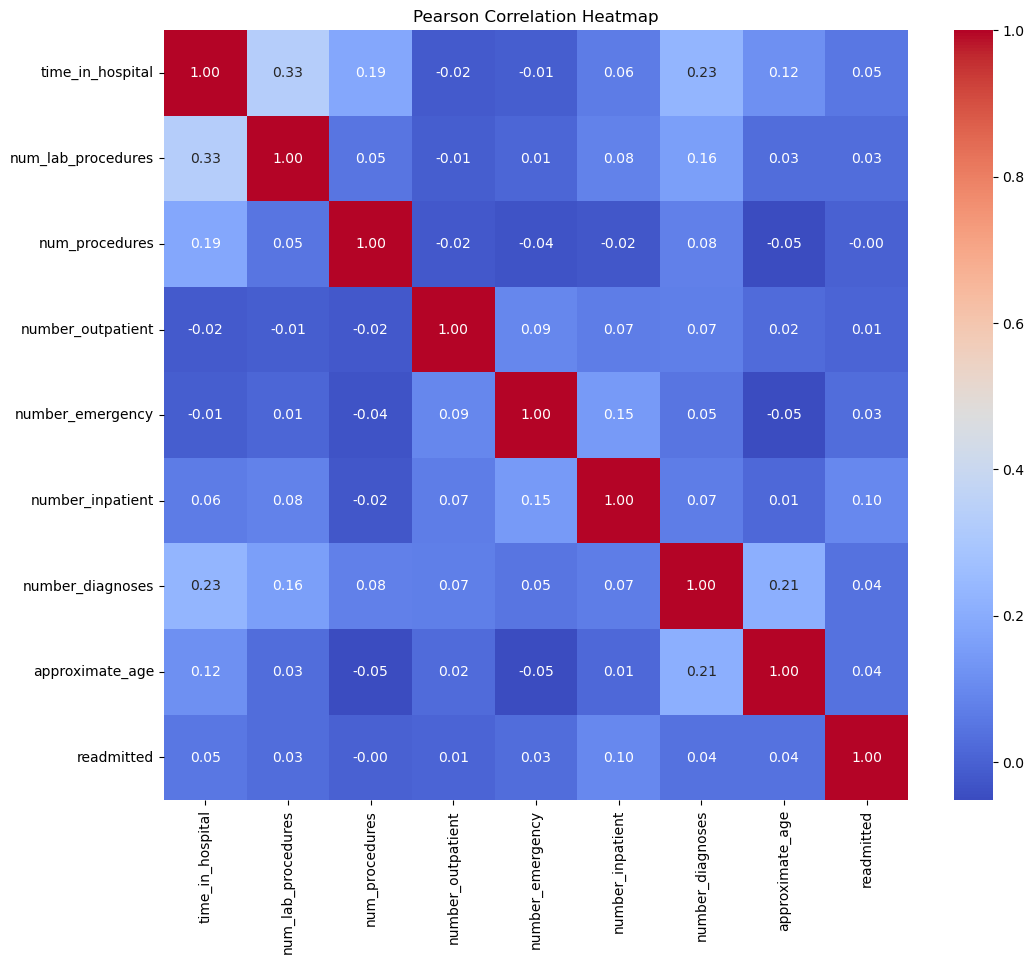

In [30]:
# Calculating Pearson correlation coefficient
correlation_matrix = df[numeric_cols + ['readmitted']].corr()

# Plotting heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

#### **Correlation Analysis**

None of the numerical features appear to have significant linear relationship with easly readmittance. Knowing this helps narrow down which type of models to consider.


Analyzing relationship between 'primary_diagnosis' and 'readmitted':
Chi-squared test statistic: 87.2445157940052
P-value: 1.6836859574406296e-15


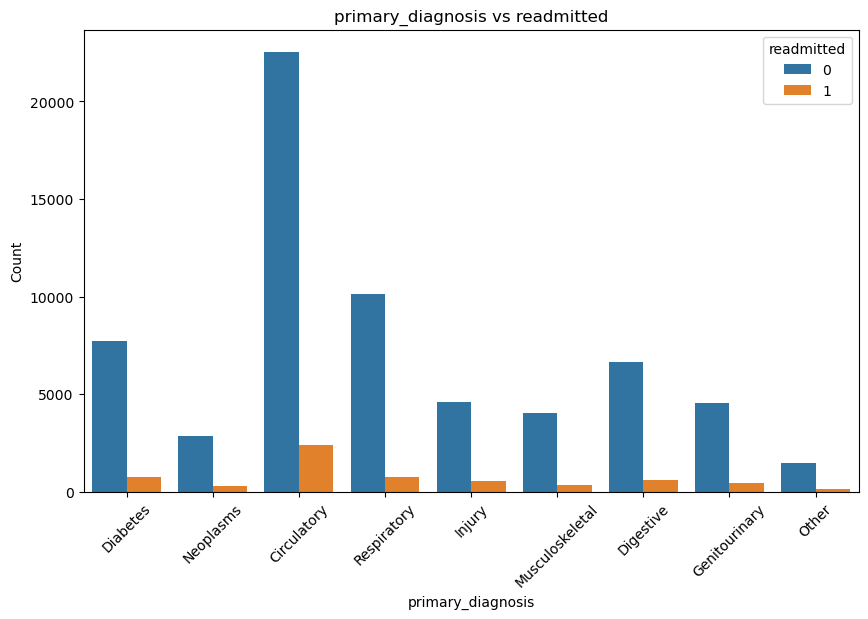


Analyzing relationship between 'admission_type' and 'readmitted':
Chi-squared test statistic: 10.831870351144575
P-value: 0.028519979317845126


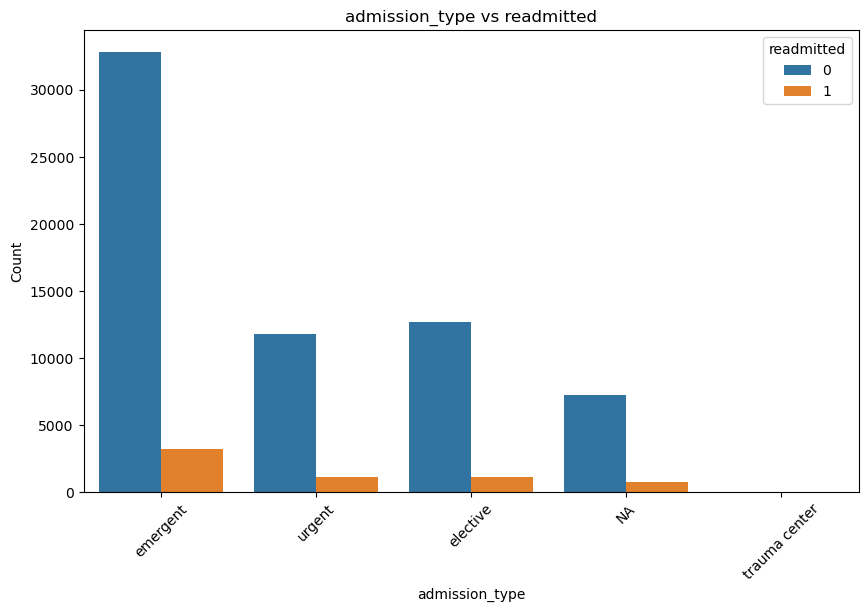


Analyzing relationship between 'admission_source' and 'readmitted':
Chi-squared test statistic: 7.006229802623631
P-value: 0.3202714544477798


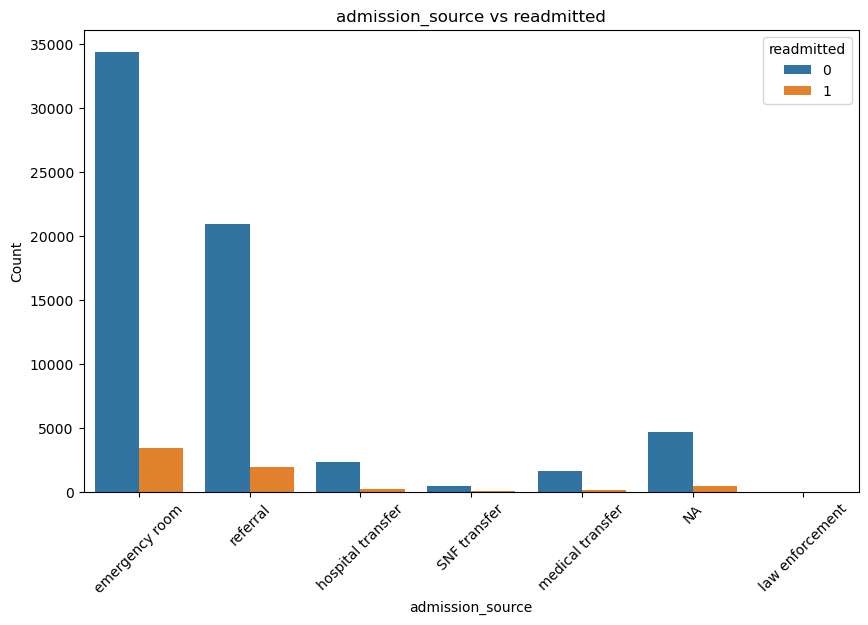


Analyzing relationship between 'discharge_dispo' and 'readmitted':
Chi-squared test statistic: 1036.6403456624296
P-value: 1.838942906337008e-218


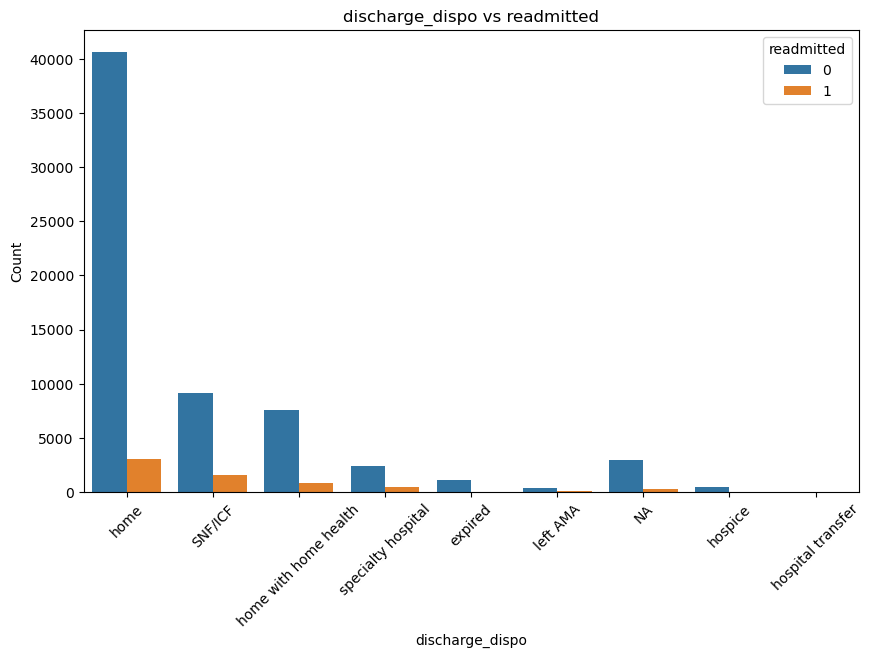


Analyzing relationship between 'gender' and 'readmitted':
Chi-squared test statistic: 0.3606311207695915
P-value: 0.5481559359712735


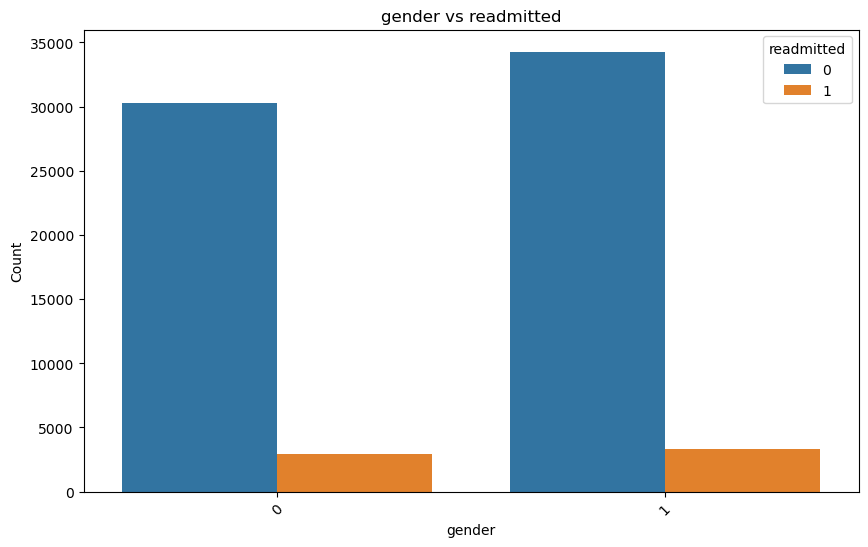


Analyzing relationship between 'change' and 'readmitted':
Chi-squared test statistic: 17.770924423162164
P-value: 2.491619753392642e-05


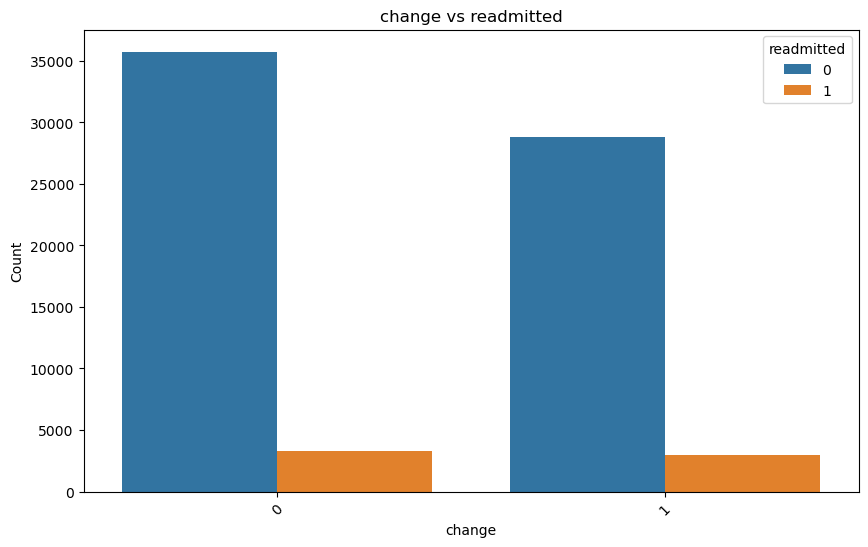


Analyzing relationship between 'diabetes_med_change' and 'readmitted':
Chi-squared test statistic: 39.561503115401926
P-value: 3.178884121200534e-10


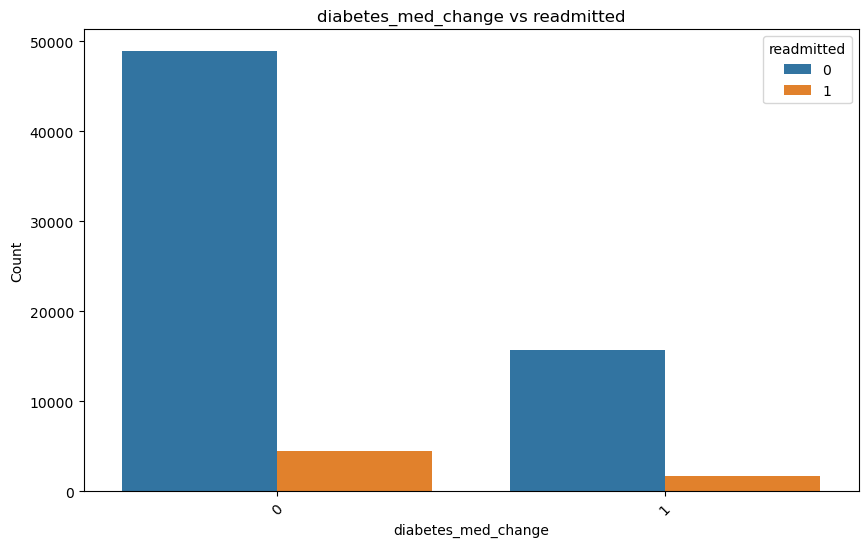


Analyzing relationship between 'oral_diabetes_med' and 'readmitted':
Chi-squared test statistic: 4.76612064593666
P-value: 0.029025157937472002


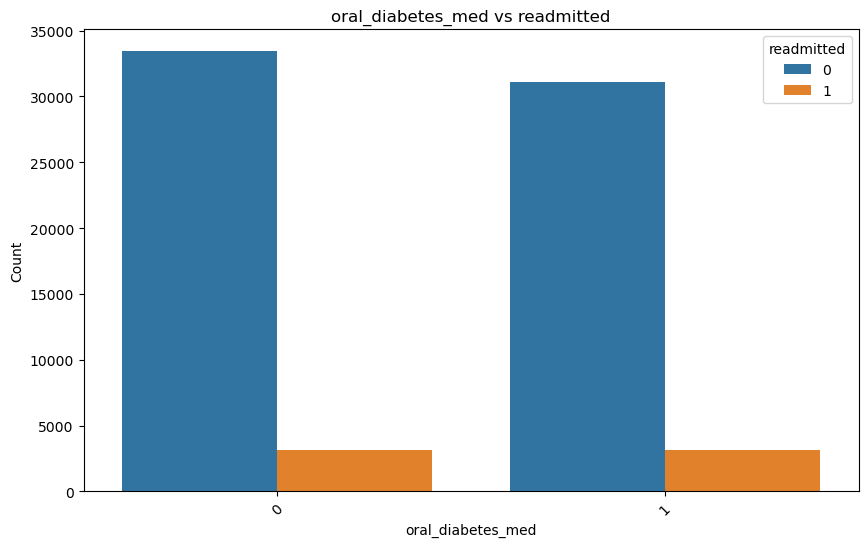


Analyzing relationship between 'insulin' and 'readmitted':
Chi-squared test statistic: 39.848272905865926
P-value: 2.744767911231785e-10


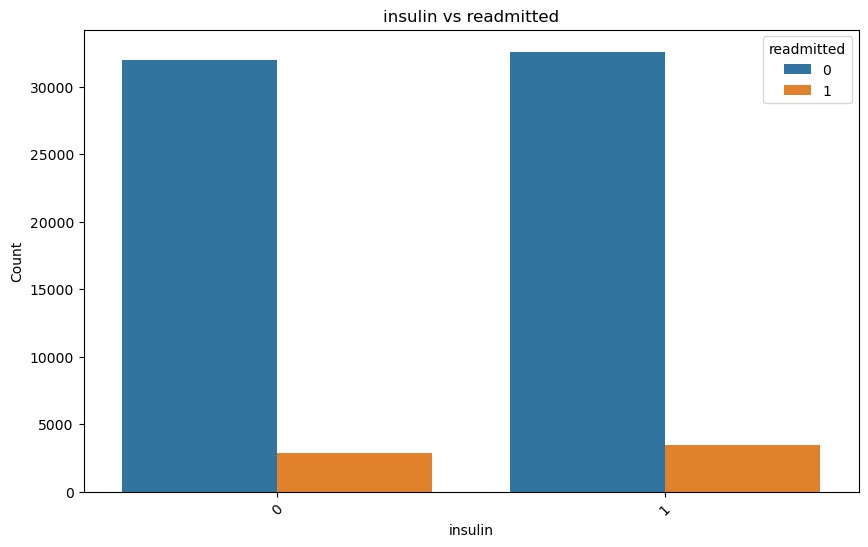


Analyzing relationship between 'any_diabetes_med' and 'readmitted':
Chi-squared test statistic: 60.17715654578751
P-value: 8.669250833869375e-15


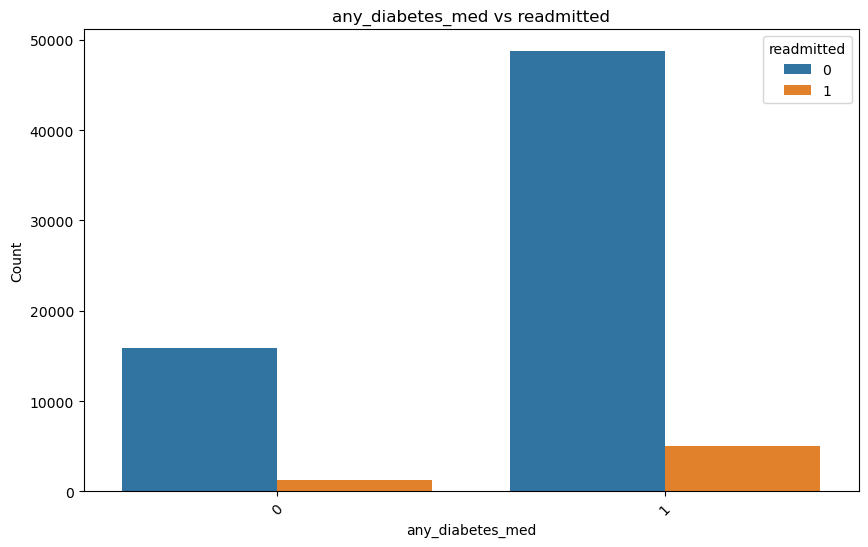

In [31]:
from scipy.stats import chi2_contingency


# Function to calculate chi-squared test and plot count plot
def chi_squared_and_plot(df, cat_col, target_col):
    # Crosstab to get frequencies
    contingency_table = pd.crosstab(df[cat_col], df[target_col])
    
    # Chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared test statistic: {chi2}")
    print(f"P-value: {p}")

    # Plot count plot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=cat_col, hue=target_col)
    plt.title(f'{cat_col} vs {target_col}')
    plt.xlabel(cat_col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title=target_col)
    plt.show()

# Iterate over categorical columns
for col in categorical_cols:
    print(f"\nAnalyzing relationship between '{col}' and 'readmitted':")
    chi_squared_and_plot(df, col, 'readmitted')

#### **Chi-Squared Analysis**

Here is the break down of the chi-squared results, considering that:
- The null hypothesis in each instance is that each feature has ***no*** relationship with readmission.
- The alpha value is 0.05.

**Primary Diagnosis and Readmission:**

The chi-squared test statistic is 87.24, indicating a *significant* relationship between primary diagnosis and readmission.
The p-value is very low (1.68e-15), suggesting strong evidence against the null hypothesis (no relationship between primary diagnosis and readmission).

**Admission Type and Readmission:**

The chi-squared test statistic is 10.83, indicating a *significant* relationship between admission type and readmission.
The p-value is 0.0285, which is less than the typical significance level of 0.05, suggesting evidence against the null hypothesis.

**Admission Source and Readmission:**

The chi-squared test statistic is 7.01, which is relatively low.
The p-value is 0.320, indicating weak evidence against the null hypothesis. This suggests that there may not be a significant relationship between admission source and readmission.

**Discharge Disposition and Readmission:**

The chi-squared test statistic is very high (1036.64), indicating a *significant* relationship between discharge disposition and readmission.
The p-value is extremely low (1.84e-218), providing strong evidence against the null hypothesis.

**Gender and Readmission:**

The chi-squared test statistic is low (0.36).
The p-value is relatively high (0.548), indicating weak evidence against the null hypothesis. This suggests that there may not be a significant relationship between gender and readmission.

**Change and Readmission:**

The chi-squared test statistic is 17.77, indicating a *significant* relationship between medication changes and readmission.
The p-value is very low (2.49e-05), providing strong evidence against the null hypothesis.
Diabetes Medication Change and Readmission:

The chi-squared test statistic is 39.56, indicating a *significant* relationship between diabetes medication change and readmission.
The p-value is very low (3.18e-10), providing strong evidence against the null hypothesis.

**Oral Diabetes Medication and Readmission:**

The chi-squared test statistic is 4.77, indicating a *significant* relationship between oral diabetes medication and readmission.
The p-value is 0.029, which is less than 0.05, suggesting evidence against the null hypothesis.

**Insulin and Readmission:**

The chi-squared test statistic is 39.85, indicating a *significant* relationship between insulin and readmission.
The p-value is very low (2.74e-10), providing strong evidence against the null hypothesis.

**Any Diabetes Medication and Readmission**

The chi-squared test statistic is 60.18, indicating a *significant* relationship between any diabetes medication and readmission.
The p-value is very low (8.67e-15), providing strong evidence against the null hypothesis.

#### **Summary**

1. All of the medication related categories seem to have a significant relationship with readmission, as well as admission type and primary diagnosis.

2. Discharge disposition has the strongest relationship with readmission, suggesting that it will be an important feature for modeling.

3. Gender and admission source's chi-squared results do not demonstrate a strong relationship with the target. 

## 4. Splitting into train, test, and validate groups

Before proceeding to pre-processing, the data will be split into train, test, and validate sets. Given the substantial amount of data available, the train dataset will be 65% of the total, the test set will be 20%, and the validation set will be 15%.

In [32]:
X = df.drop(columns='readmitted')
y = df['readmitted']

# Splitting the dataset into training and testing sets while stratifying by the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1875, stratify=y_train, random_state=42)

## 5. Pre-Processing

Pre-processing steps will involve scaling the numerical data and encoding the categorical data.

The final pre-processing step will address the class imbalance in the target variable. While 0 is overwhelmingly over-represented, the primary goal is to accurately categorize instances of 1. To address this issue, SMOTE will be utilized.

In [33]:
# Instantiate pipeline transformers
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocessing pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Retrieve the column names after one-hot encoding
encoded_columns = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=categorical_cols)

# Define the function to convert numpy array to DataFrame
def convert_to_dataframe(X, columns):
    return pd.DataFrame(X, columns=np.concatenate([numeric_cols, encoded_columns]))

# Create the FunctionTransformer instance
to_dataframe = FunctionTransformer(func=convert_to_dataframe, kw_args={'columns': np.concatenate([numeric_cols, encoded_columns])})

# Combine preprocessing and DataFrame conversion steps
preprocess_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('to_dataframe', to_dataframe)
])

# Fit and transform the training data
X_train_transformed = preprocess_pipeline.fit_transform(X_train)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train, y_train = smote.fit_resample(X_train_transformed, y_train)

X_train

,time_in_hospital,num_lab_procedures,num_procedures,number_outpatient,number_emergency,number_inpatient,number_diagnoses,approximate_age,primary_diagnosis_Circulatory,primary_diagnosis_Diabetes,...,change_0,change_1,diabetes_med_change_0,diabetes_med_change_1,oral_diabetes_med_0,oral_diabetes_med_1,insulin_0,insulin_1,any_diabetes_med_0,any_diabetes_med_1
0,-1.117746,-1.356088,-0.815387,0.694859,1.787840,-0.294265,-0.146116,0.584542,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.0,1.0,0.0,1.0,0.0,1.0
1,-0.779721,-1.305996,-0.815387,-0.268446,-0.205293,-0.294265,-1.678482,-0.091112,1.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.0,1.0,1.0,0.0,0.0,1.0
2,-0.103672,1.398935,-0.248061,-0.268446,-0.205293,-0.294265,-1.678482,-0.091112,0.0,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.0,0.0,1.0,0.0,1.0,0.0
3,0.234353,0.146652,0.319265,-0.268446,-0.205293,-0.294265,0.875462,-0.091112,0.0,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.0,1.0,1.0,0.0,0.0,1.0
4,0.572378,-0.103804,2.588568,-0.268446,-0.205293,-0.294265,0.875462,0.584542,1.0,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83911,1.162494,1.061877,1.386596,-0.268446,-0.205293,-0.294265,0.875462,-0.091112,0.0,0.627112,...,0.000000,1.000000,0.000000,1.000000,1.0,0.0,0.0,1.0,0.0,1.0
83912,0.387390,-0.207725,-0.815387,-0.268446,4.144563,3.273661,-1.212589,-1.965126,0.0,1.000000,...,0.817579,0.182421,0.817579,0.182421,1.0,0.0,0.0,1.0,0.0,1.0
83913,0.122361,0.907837,2.494587,-0.268446,-0.205293,-0.294265,-0.656904,-0.654839,1.0,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.0,1.0,1.0,0.0,0.0,1.0
83914,0.370141,-0.548062,0.621515,-0.268446,-0.205293,1.340583,0.875462,0.540268,1.0,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.0,0.0,0.0,1.0,0.0,1.0


## 6. Principal Component Analysis

Even after consolidating diabetes medications and dropping irrelevant features, after encoding there are still 50 features.

Before modeling, a principal component analysis (PCA) will be conducted to optimise the amount of features used.

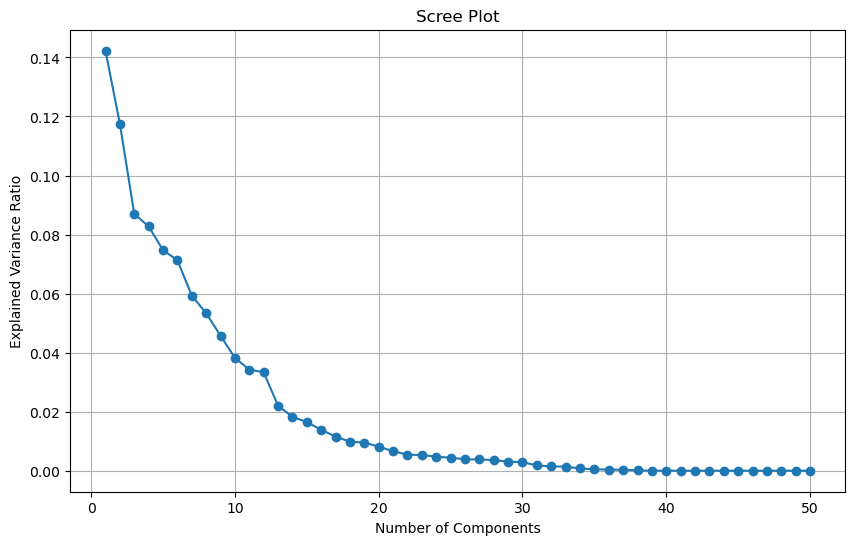

In [34]:
# Initialize PCA with all components
pca = PCA()

# Fit PCA on the training data
pca.fit(X_train)

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

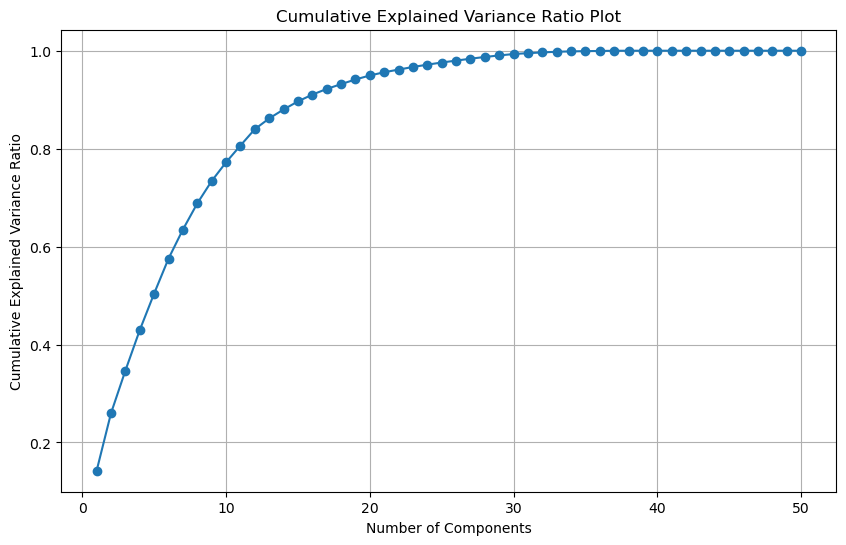

In [35]:
# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio Plot')
plt.grid(True)
plt.show()

#### **PCA Analyis**

According the the visuals, 12-14 features seems to be the optimal amount of components to use.

## 7. Base Model Random Forest

Because of the amount of features present and the complexity of the relationship the data shares with the target, I chose to first use a random forest will all of the features.

In [37]:
# Define the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

random_forest.fit(X_train, y_train)

X_val = preprocess_pipeline.transform(X_val)

y_val_pred = random_forest.predict(X_val)

# Generate classification report
report = classification_report(y_val, y_val_pred)

# Print the report
print(report)

#### **Base Model Analysis**

The primary scoring metric for this project is recall, given its significance in minimizing false negatives. In this context, a false negative occurs when a patient is incorrectly classified as not likely to be readmitted within 30 days of discharge, when in reality, they are. Overlooking such patients during model deployment could lead to missed opportunities for readmission-reducing interventions.

According to metrics for class '1', readmission, aren't great, so we'll hyperparameter tune the model with GridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced', {0: 1, 1: 10}, {0: 1, 1: 100}],
    'max_features': ['auto', 'sqrt', 'log2'] 
}

# Instantiate the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best estimator
best_random_forest = grid_search.best_estimator_

# Predictions on the validation set using the best estimator
y_pred = best_random_forest.predict(X_val)

# Generate classification report
report = classification_report(y_val, y_pred)

# Print the report
print(report)


In [ ]:
importances = best_random_forest.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns, 
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print(feature_importance_df)

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

# Compute AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [38]:
# Select subset of features
selected_features = ['approximate_age', 'time_in_hospital', 'number_diagnoses', 'num_lab_procedures', 'num_procedures', 'primary_diagnosis_Circulatory', 'discharge_dispo_home', 'discharge_dispo_SNF/ICF', 'primary_diagnosis_Respiratory', 'number_inpatient', 'primary_diagnosis_Digestive', 'primary_diagnosis_Diabetes']  
# Subset the training and validation data
X_train_subset = X_train[selected_features]
X_val_subset = X_val[selected_features]

# Instantiate the Random Forest classifier
random_forest_2 = RandomForestClassifier(random_state=42)

# Train the model on your training data subset
random_forest_2.fit(X_train_subset, y_train)

# Predictions on the validation set using the subset model
y_pred_subset = random_forest_2.predict(X_val_subset)

# Generate classification report
report_subset = classification_report(y_val, y_pred_subset)

# Print the report
print(report_subset)

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced', {0: 1, 1: 10}, {0: 1, 1: 100}],
    'max_features': ['auto', 'sqrt', 'log2'] 
}

# Instantiate the Random Forest classifier
random_forest3 = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_subset, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best estimator
best_random_forest = grid_search.best_estimator_

# Predictions on the validation set using the best estimator
y_pred = best_random_forest.predict(X_val_subset)

# Generate classification report
report = classification_report(y_val, y_pred)

# Print the report
print(report)

In [ ]:
X_test_subset = X_test[selected_features]

# Predictions on the validation set
y_pred_test = random_forest_2.predict(X_test_subset)

# Generate classification report
report = classification_report(y_test, y_pred_test)

# Print the report
print(report)

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [39]:
# Instantiate XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# You can specify various hyperparameters here to customize the model, such as max_depth, learning_rate, n_estimators, etc.
# Example:
# xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', max_depth=3, learning_rate=0.1, n_estimators=100, random_state=42)

# Print the default parameters of the classifier
print("Default parameters of XGBoost classifier:")
print(xgb_classifier.get_params())

# Fit the classifier to the training data
xgb_classifier.fit(X_train_subset, y_train)

# Predict on the validation set
y_pred = xgb_classifier.predict(X_val_subset)

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

Default parameters of XGBoost classifier:
{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Classification Report:
              pr

In [ ]:
# Define the parameter grid
param_grid = {
    'scale_pos_weight': [1, 5, 10],  # Different values for addressing class imbalance
    'max_depth': [3, 6, 9],           # Maximum depth of a tree
    'min_child_weight': [1, 3, 5],    # Minimum sum of instance weight needed in a child
    'learning_rate': [0.1, 0.01],     # Step size shrinkage used to prevent overfitting
    'n_estimators': [100, 200],       # Number of boosting rounds
    'reg_alpha': [0, 0.1, 1],         # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 1]         # L2 regularization term on weights
}

# Instantiate the XGBClassifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='precision', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_subset, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best estimator
best_xgb_classifier = grid_search.best_estimator_

# Predictions on the validation set using the best estimator
y_pred = best_xgb_classifier.predict(X_val_subset)

# Generate classification report
report = classification_report(y_val, y_pred)

# Print the report
print(report)

In [ ]:
def adjust_threshold_and_evaluate(true_labels, predictions, threshold):
    adjusted_predictions = (predictions >= threshold).astype(int)
    recall = recall_score(true_labels, adjusted_predictions)
    print(f"Adjusted Recall: {recall:.4f}")
    return recall

In [ ]:
adjust_threshold_and_evaluate(y_val, y_pred, threshold=.4)

In [ ]:
# Instantiate the neural network model
model = Sequential()

# Add input layer
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Add hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout regularization to prevent overfitting

# Add output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Print model summary
print(model.summary())

In [ ]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.5f}, Validation Accuracy: {accuracy:.5f}')

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Extract true positives (TP) and false negatives (FN)
TP = cm[1, 1]
FN = cm[1, 0]

# Calculate recall
recall = TP / (TP + FN)
recall